In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys

sys.path.append("../")

from depo.functions import Functions as func
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dttt1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_train = func.open_file('dataSet.zip/train.csv')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19 non-null     int64 
 1   text    19 non-null     object
 2   genre   19 non-null     object
dtypes: int64(1), object(2)
memory usage: 584.0+ bytes


In [3]:
df_train.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
df_train = df_train.drop('id', axis=1)

In [5]:
df_train.print_nan_columns()

,Missing Values,% Missing Values,Zero Values,% Missing Values,Zero Missing Values,% Zero Missing Values,Data Type
text,0,0.00,0,0.00,0,0.00,object
genre,0,0.00,0,0.00,0,0.00,object
Total,0,0.00,0,0.00,0,0.00,-


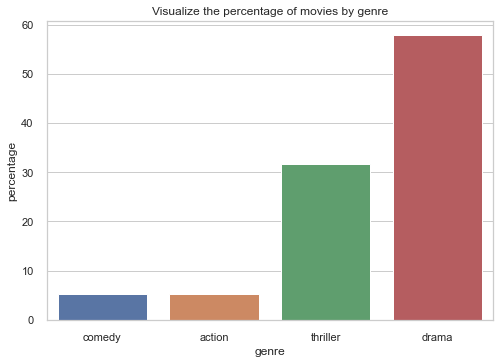

In [6]:
df_perc = (df_train["genre"].value_counts() / len(df_train)) * 100
df_perc.sort_values(inplace=True)  

df_perc = df_perc.to_frame()
df_perc.columns = ['percentage']
df_perc.index.names = ['genre']
df_perc['genre'] = df_perc.index

import seaborn as sns
import pylab as plt

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'genre', y = 'percentage', data=df_perc)
plt.title('Visualize the percentage of movies by genre')
plt.show()


In [7]:
# Maps the genres to value
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df_train['genre_index'] = df_train['genre'].map(genre_mapper)
df_train.head(10)

,text,genre,genre_index
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,8
1,"t, summa cum laude and all. And I'm about to l...",comedy,3
2,"up Come, I have a surprise.... She takes him ...",drama,4
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller,8
4,"nd dismounts, just as the other children reach...",drama,4
5,breadth of the bluff. Gabe pulls out his ancie...,thriller,8
6,uilding. A MAN in pajamas runs out into the ra...,thriller,8
7,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama,4
8,"Memphis goes back into the garage, Budgy cack...",thriller,8
9,e reels as the world spins. Sweat pours off hi...,action,1


In [8]:
corpus = df_train['text'].get_stemme_text()

In [9]:
df_movies_genres = pd.DataFrame(columns=['text', 'genre', 'genre_index'])

df_unique = df_train.drop_duplicates(['genre','genre_index'])[['genre','genre_index']]
df_unique = df_unique.sort_values(by = 'genre_index', ascending=True).reset_index(drop=True)

for i in range(0, len(df_unique)):
    for j in list(df_train[df_train['genre_index']== df_unique['genre_index'][i]].index):
        text = corpus[j]
        genre = df_unique['genre'][i]
        genre_index = df_unique['genre_index'][i]
        
        df_movies_genres = df_movies_genres.append({'text': text
                                                  , 'genre': genre 
                                                  , 'genre_index': genre_index}, ignore_index=True) 

df_movies_genres.head()

,text,genre,genre_index
0,e reel world spin sweat pour pressur build ins...,action,1
1,summa cum laud launch brand new magazin call e...,comedy,3
2,come surpris take hand lead hallway salvator l...,drama,4
3,nd dismount children reach throw arm embrac ch...,drama,4
4,ell rita hayworth disgustingli rich well make ...,drama,4


In [10]:
X = df_movies_genres['text'].get_bag_of_words(max_features=10000, ngram_range=(1,2))
y = df_movies_genres['genre'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (15, 2828), X_test size: (4, 2828)


In [12]:
func.print_models_scores(X_train, X_test, y_train, y_test)

100%|██████████| 43/43 [00:01<00:00, 25.57it/s]

LazyRegressor
Empty DataFrame
Columns: [R-Squared, RMSE, Time Taken]
Index: []
Empty DataFrame
Columns: [R-Squared, RMSE, Time Taken]
Index: []


In [13]:
#func.print_balanded_models_scores(X, y)